# Analyzing tension model performance

In [1]:
import numpy
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
from train import *
import matplotlib.pyplot as plt
from utils import *

## Prepare pretrained model

In [3]:
%cd ../

/Users/sivanding/Codebase/Neuro_Harmonilizer


In [4]:
# create model architecture
model = tension_model()
model2 = fixed_tension_model()

In [5]:
# load model weights
model.load_weights('./models/best_model_train_03.keras')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cqt/mag (InputLayer)            [(None, None, 216, 2 0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, 216, 2) 8           cqt/mag[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, 216, 1) 51          batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, None, 216, 1) 4           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [11]:
# load fixed model
model2.load_weights('./models/best_model_train_02.keras')
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cqt/mag (InputLayer)            [(None, None, 216, 2 0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, 216, 2) 8           cqt/mag[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, 216, 1) 51          batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, None, 216, 1) 4           conv2d_1[0][0]                   
____________________________________________________________________________________________

## Model Diagnostics

In [16]:
import librosa.display

### first conv2d layers

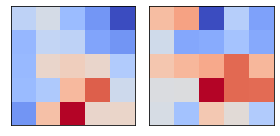

In [18]:
conv1 = model.get_weights()[4]
plt.figure(figsize=2 * np.asarray(conv1.shape[2:]))

pi = 0
for f in range(conv1.shape[3]):
    for c in range(conv1.shape[2]):
        pi += 1
        plt.subplot(conv1.shape[3], conv1.shape[2], pi)
        librosa.display.specshow(conv1[:, :, c, f].T)#, vmin=l1.min(), vmax=l1.max())


plt.tight_layout()

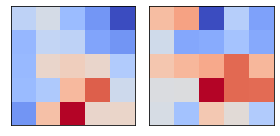

In [33]:

conv1 = model2.get_weights()[4]
plt.figure(figsize=2 * np.asarray(conv1.shape[2:]))

pi = 0
for f in range(conv1.shape[3]):
    for c in range(conv1.shape[2]):
        pi += 1
        plt.subplot(conv1.shape[3], conv1.shape[2], pi)
        librosa.display.specshow(conv1[:, :, c, f].T)#, vmin=l1.min(), vmax=l1.max())


plt.tight_layout()

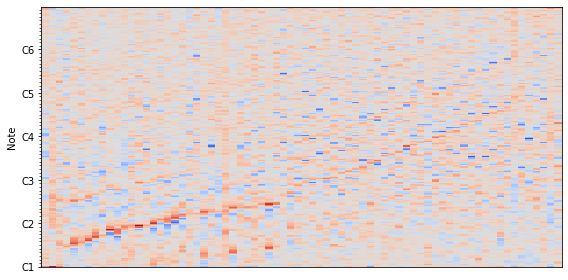

In [47]:
l2 = model.get_weights()[10].squeeze()
l2 = librosa.util.axis_sort(l2)
plt.figure(figsize=(8, 4))
librosa.display.specshow(l2, y_axis='cqt_note', sr=44100, bins_per_octave=36)
plt.tight_layout()

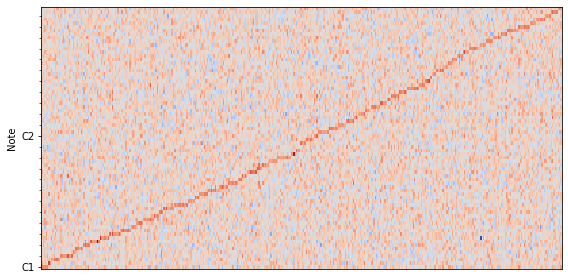

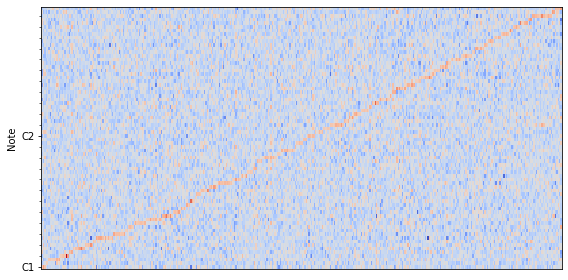

In [63]:
# forward GRU and backward
l2 = model.get_weights()[16].squeeze()
l2 = librosa.util.axis_sort(l2)
plt.figure(figsize=(8, 4))
librosa.display.specshow(l2, y_axis='cqt_note', sr=44100, bins_per_octave=36)
plt.tight_layout()

l2 = model.get_weights()[19].squeeze()
l2 = librosa.util.axis_sort(l2)
plt.figure(figsize=(8, 4))
librosa.display.specshow(l2, y_axis='cqt_note', sr=44100, bins_per_octave=36)
plt.tight_layout()

### forward GRU and backward

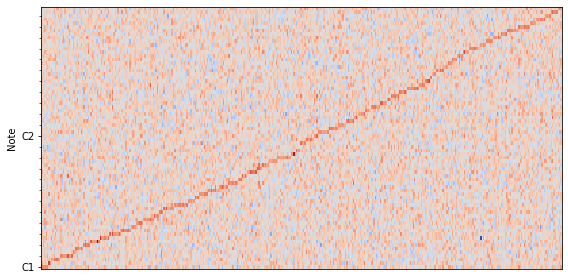

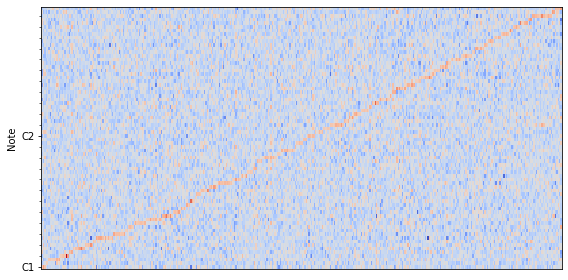

In [64]:

l2 = model2.get_weights()[16].squeeze()
l2 = librosa.util.axis_sort(l2)
plt.figure(figsize=(8, 4))
librosa.display.specshow(l2, y_axis='cqt_note', sr=44100, bins_per_octave=36)
plt.tight_layout()

l2 = model2.get_weights()[19].squeeze()
l2 = librosa.util.axis_sort(l2)
plt.figure(figsize=(8, 4))
librosa.display.specshow(l2, y_axis='cqt_note', sr=44100, bins_per_octave=36)
plt.tight_layout()

## Inspect on examples

In [72]:
# load and display an example audio in jazznet
# a low tension one
lowt = '/Users/sivanding/database/jazznet/chords/maj/F-3-maj-chord-0.wav'
lowt_jam = '/Users/sivanding/database/jazznet/metadata/chords/F-3-maj-chord-0.jams'
# a high tension chord
hight= '/Users/sivanding/database/jazznet/chords/dim7/G-7-dim7-chord-1.wav'
hight_jam = '/Users/sivanding/database/jazznet/metadata/chords/G-7-dim7-chord-1.jams'



In [209]:
# hear them out
import IPython.display as ipd
ipd.Audio(lowt)


In [210]:
ipd.Audio(hight)

In [73]:
# get cqt
cqt_low = preprocess_audio(lowt, lowt_jam)
cqt_high = preprocess_audio(hight, hight_jam)

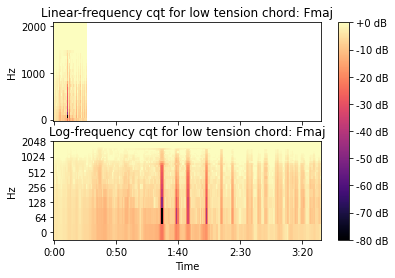

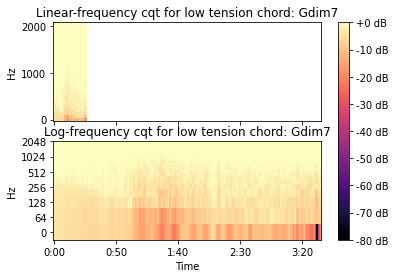

In [85]:
# display them
sr = 4096
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(cqt_low[:,:,0], ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency cqt for low tension chord: Fmaj')
ax[0].label_outer()

hop_length =4096
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency cqt for low tension chord: Fmaj')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(cqt_high[:,:,0], ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency cqt for low tension chord: Gdim7')
ax[0].label_outer()

hop_length =4096
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency cqt for low tension chord: Gdim7')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [120]:
# show model results - retrained model
# results for all 32 frames
ori, tension = model(np.expand_dims(cqt_low, axis=0))
ori = np.array(ori).squeeze().mean()
tension = np.array(tension).squeeze().mean(axis=0)
print(ori, np.argmax(tension))

gt_ori, gt_tenstion = chord2polar('F:maj')
print(gt_ori, gt_tenstion)

-0.30772072 23
140.0 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [121]:
ori, tension = model(np.expand_dims(cqt_high, axis=0))
ori = np.array(ori).squeeze().mean()
tension = np.array(tension).squeeze().mean(axis=0)
print(ori, np.argmax(tension))

gt_ori, gt_tenstion = chord2polar('G:dim7')
print(gt_ori, gt_tenstion)

0.12262314 23
165.0 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [122]:
# show model results - fixed model
# results for all 32 frames
ori, tension = model2(np.expand_dims(cqt_low, axis=0))
ori = np.array(ori).squeeze().mean()
tension = np.array(tension).squeeze().mean(axis=0)
print(ori, np.argmax(tension))

gt_ori, gt_tenstion = chord2polar('F:maj')
print(gt_ori, gt_tenstion)
ori, tension = model2(np.expand_dims(cqt_high, axis=0))
ori = np.array(ori).squeeze().mean()
tension = np.array(tension).squeeze().mean(axis=0)
print(ori, np.argmax(tension))

gt_ori, gt_tenstion = chord2polar('G:dim7')
print(gt_ori, gt_tenstion)

133.84335 1
140.0 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
164.80841 7
165.0 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


## Performance over individual chords

In [6]:
import tensorflow as tf
from tqdm.notebook import tqdm

In [7]:
database = "/Users/sivanding/database/jazznet/chords"
metadata = "/Users/sivanding/database/jazznet/metadata/tiny.csv"

In [8]:
def metric_filter(model, qualities):
    mses = {}
    accuracies = {}

    for quality in qualities:
        test_data, chords = prepare_data(database, metadata, 'test', filter=quality)
        feats, oris,tens = test_data
        quality = quality[0]
        print(f"#{quality}:{feats.shape[0]}")
        for (feat, gt_ori, gt_ten) in tqdm(zip(feats, oris, tens)):
            feat = np.expand_dims(feat, axis=0)
            ori, ten = model(feat)
            ori = np.array(ori).squeeze()
            ten = np.array(ten).squeeze()
            # print(ori.shape, ten.shape, gt_ori.shape, gt_ten.shape)

            mse = np.mean((ori-gt_ori) ** 2)
            ten = tf.one_hot(tf.argmax(ten, axis=1), depth=ten.shape[1])
            acc = sklearn.metrics.accuracy_score(ten, gt_ten)

            if quality not in mses:
                mses[quality] = []
            mses[quality].append(mse)

            if quality not in accuracies:
                accuracies[quality] = []
            accuracies[quality].append(acc)

    mses = pd.DataFrame.from_dict(mses, orient='index').transpose()
    accuracies = pd.DataFrame.from_dict(accuracies, orient='index').transpose()

    return mses, accuracies

In [9]:
qualities = ['maj', 'min', 'aug', 'dim', 'sus2', 'sus4', 'dim7', 'maj7', 'min7', 'min7b5', 'seventh', 'sixth']
qualities = [[i] for i in qualities]
mses, accuracies = metric_filter(model, qualities)
mses.to_pickle('./data/mses_all')
accuracies.to_pickle('./data/accs_all')

#maj:28


0it [00:00, ?it/s]

#min:17


0it [00:00, ?it/s]

#aug:38


0it [00:00, ?it/s]

#dim:21


0it [00:00, ?it/s]

#sus2:29


0it [00:00, ?it/s]

#sus4:19


0it [00:00, ?it/s]

#dim7:41


0it [00:00, ?it/s]

#maj7:41


0it [00:00, ?it/s]

#min7:36


0it [00:00, ?it/s]

#min7b5:30


0it [00:00, ?it/s]

#seventh:32


0it [00:00, ?it/s]

#sixth:45


0it [00:00, ?it/s]

In [10]:
def plot_metrics(mses, accuracies, t1, t2):
    plt.figure(figsize=(10,5))
    mses.boxplot()
    plt.title(t1)
    plt.ylabel('MSE')


    plt.figure(figsize=(10,5))
    accuracies.boxplot()
    plt.title(t2)
    plt.ylabel('accuracy')

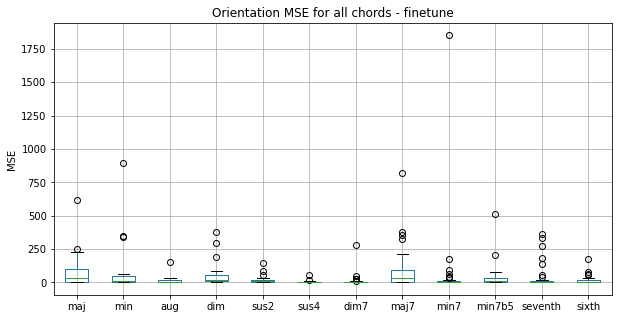

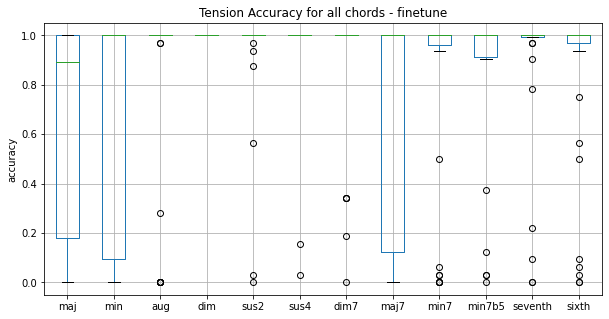

In [11]:
plot_metrics(mses, accuracies,'Orientation MSE for all chords - finetune', 'Tension Accuracy for all chords - finetune')

#maj:28


0it [00:00, ?it/s]

#min:17


0it [00:00, ?it/s]

#aug:38


0it [00:00, ?it/s]

#dim:21


0it [00:00, ?it/s]

#sus2:29


0it [00:00, ?it/s]

#sus4:19


0it [00:00, ?it/s]

#dim7:41


0it [00:00, ?it/s]

#maj7:41


0it [00:00, ?it/s]

#min7:36


0it [00:00, ?it/s]

#min7b5:30


0it [00:00, ?it/s]

#seventh:32


0it [00:00, ?it/s]

#sixth:45


0it [00:00, ?it/s]

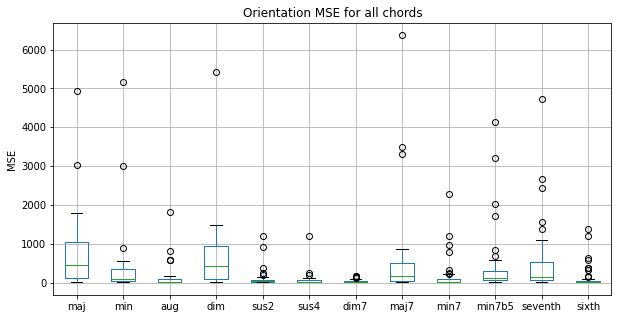

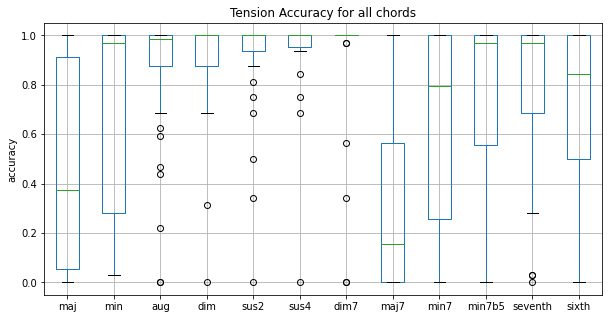

In [192]:
# check out fixed model
qualities = ['maj', 'min', 'aug', 'dim', 'sus2', 'sus4', 'dim7', 'maj7', 'min7', 'min7b5', 'seventh', 'sixth']
qualities = [[i] for i in qualities]
mses, accuracies = metric_filter(model2, qualities)
mses.to_pickle('./data/mses_all2')
accuracies.to_pickle('./data/accs_all2')
plot_metrics(mses, accuracies, 'Orientation MSE for all chords - fixed', 'Tension Accuracy for all chords - fixed')

## Performance over triad vs. tetrad

In [12]:
# store performance independently for triad and tetrad
qualities = [['maj', 'min', 'aug', 'dim', 'sus2', 'sus4'],
             ['dim7', 'maj7', 'min7', 'min7b5', 'seventh', 'sixth']]
mses, accuracies = metric_filter(model, qualities)
mses.to_pickle('./data/mses_triads')
accuracies.to_pickle('./data/accs_triads')

#maj:152


0it [00:00, ?it/s]

#dim7:225


0it [00:00, ?it/s]

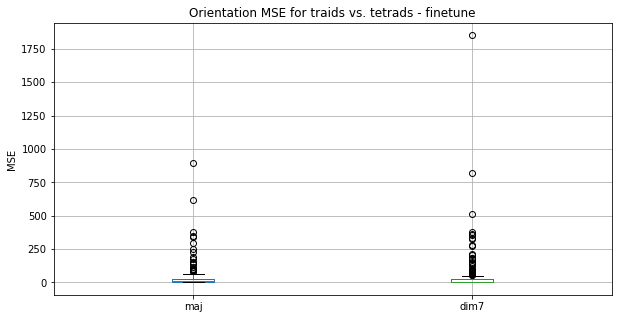

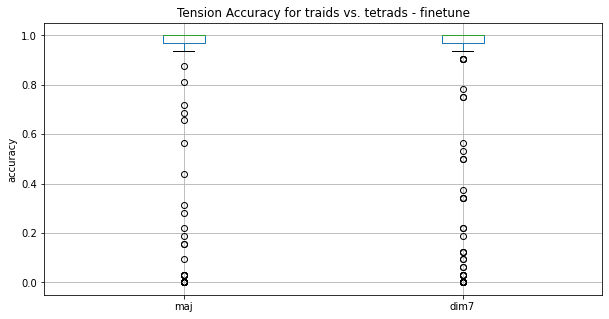

In [13]:
plot_metrics(mses, accuracies, 'Orientation MSE for traids vs. tetrads - finetune',
             'Tension Accuracy for traids vs. tetrads - finetune')

In [197]:
# store performance independently for triad and tetrad
qualities = [['maj', 'min', 'aug', 'dim', 'sus2', 'sus4'],
             ['dim7', 'maj7', 'min7', 'min7b5', 'seventh', 'sixth']]
mses, accuracies = metric_filter(model2, qualities)
mses.to_pickle('./data/mses_triads2')
accuracies.to_pickle('./data/accs_triads2')

#maj:152


0it [00:00, ?it/s]

#dim7:225


0it [00:00, ?it/s]

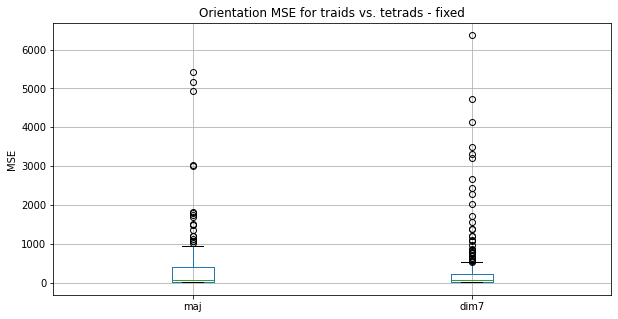

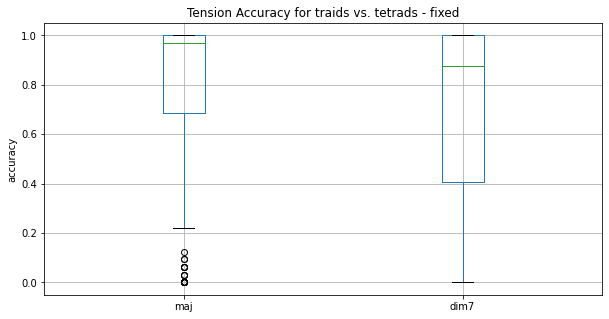

In [198]:
plot_metrics(mses, accuracies, 'Orientation MSE for traids vs. tetrads - fixed',
             'Tension Accuracy for traids vs. tetrads - fixed')

## Performance over individual tension class

In [202]:
# let's first see what tensions class are the chords in
qualities = ['maj', 'min', 'aug', 'dim', 'sus2', 'sus4', 'dim7', 'maj7', 'min7', 'min7b5', 'seventh', 'sixth']
root = 'C:'

for quality in qualities:
    ori, tension = chord2polar(root+quality)
    tension = np.argmax(tension)
    print(quality, tension)

maj 1
min 1
aug 1
dim 7
sus2 1
sus4 1
dim7 7
maj7 5
min7 1
min7b5 7
seventh 7
sixth 1


In [14]:
qualities = [['maj', 'min', 'aug', 'sus2', 'sus4', 'min7', 'sixth'],
             ['maj7'],
             ['dim', 'dim7', 'min7b5', 'seventh']]
mses, accuracies = metric_filter(model, qualities)
mses.to_pickle('./data/mses_tensions')
accuracies.to_pickle('./data/accs_tensions')

#maj:212


0it [00:00, ?it/s]

#maj7:41


0it [00:00, ?it/s]

#dim:124


0it [00:00, ?it/s]

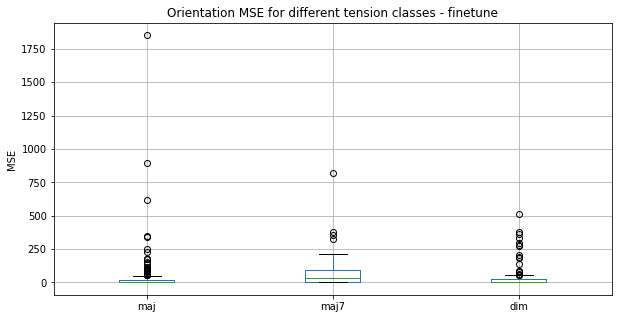

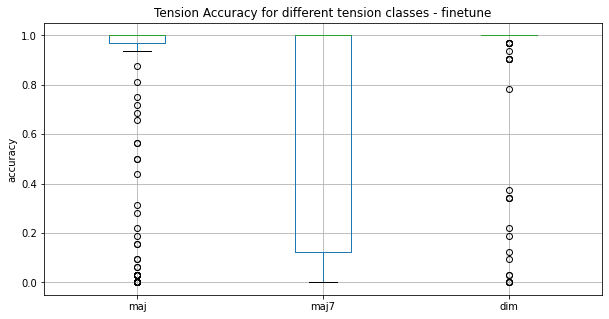

In [15]:
plot_metrics(mses, accuracies, 'Orientation MSE for different tension classes - finetune',
             'Tension Accuracy for different tension classes - finetune')

#maj:212


0it [00:00, ?it/s]

#maj7:41


0it [00:00, ?it/s]

#dim:124


0it [00:00, ?it/s]

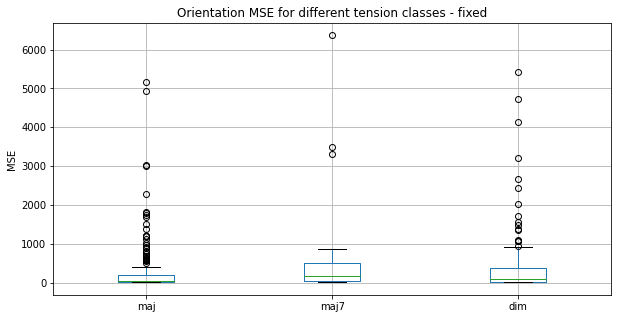

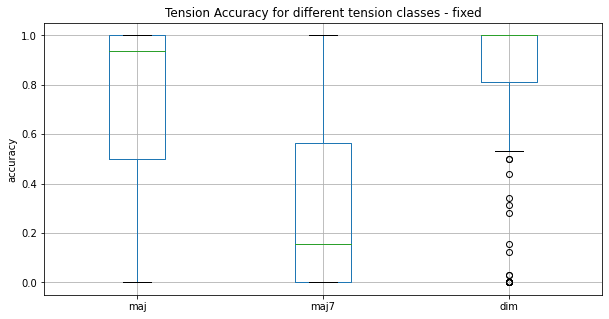

In [207]:
qualities = [['maj', 'min', 'aug', 'sus2', 'sus4', 'min7', 'sixth'],
             ['maj7'],
             ['dim', 'dim7', 'min7b5', 'seventh']]
mses, accuracies = metric_filter(model2, qualities)
mses.to_pickle('./data/mses_tensions2')
accuracies.to_pickle('./data/accs_tensions2')
plot_metrics(mses, accuracies, 'Orientation MSE for different tension classes - fixed',
             'Tension Accuracy for different tension classes - fixed')